<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\beall\AppData\Local\Temp\ipykernel_15412\1520018847.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


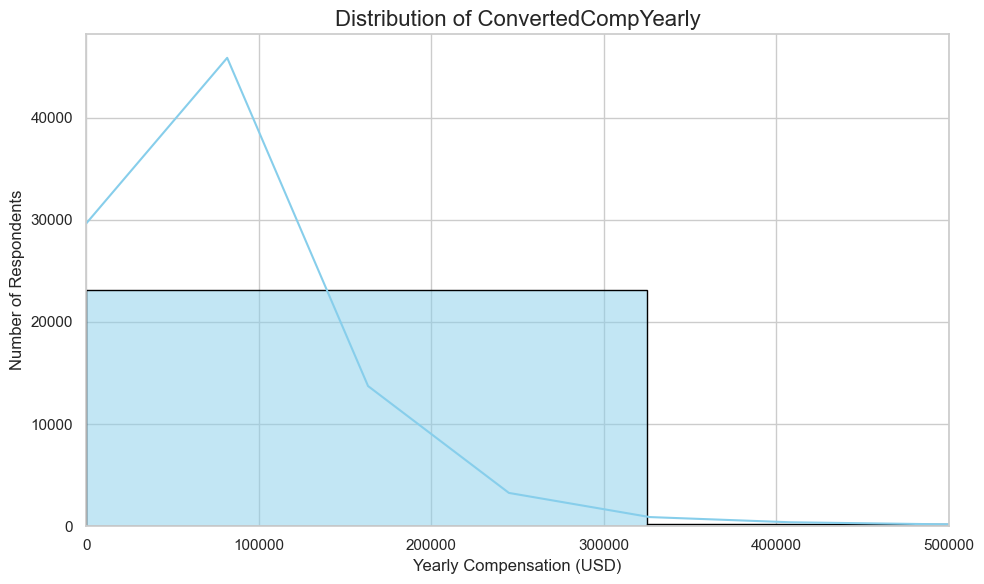

In [11]:
# Drop missing or extreme values (optional, depending on your data)
data = df['ConvertedCompYearly'].dropna()

# Set plot style
sns.set(style="whitegrid")

# Create the histogram with a KDE (Kernel Density Estimate) overlay
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, bins=50, color='skyblue', edgecolor='black')

# Customize plot
plt.title('Distribution of ConvertedCompYearly', fontsize=16)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Number of Respondents', fontsize=12)
plt.xlim(0, 500000)
plt.tight_layout()

plt.show()


In [12]:
print(df['ConvertedCompYearly'].dropna())


72         7322.0
374       30074.0
379       91295.0
385       53703.0
389      110000.0
           ...   
41180     44640.0
41184    170000.0
41185    116844.0
41186     12000.0
41187    222834.0
Name: ConvertedCompYearly, Length: 23435, dtype: float64


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [13]:
# Filter for full-time employed respondents
full_time = df[df['Employment'] == 'Employed, full-time']

# Calculate median of ConvertedCompYearly
median_comp = full_time['ConvertedCompYearly'].median()

print(f"Median compensation for full-time employees: ${median_comp:,.2f}")


Median compensation for full-time employees: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



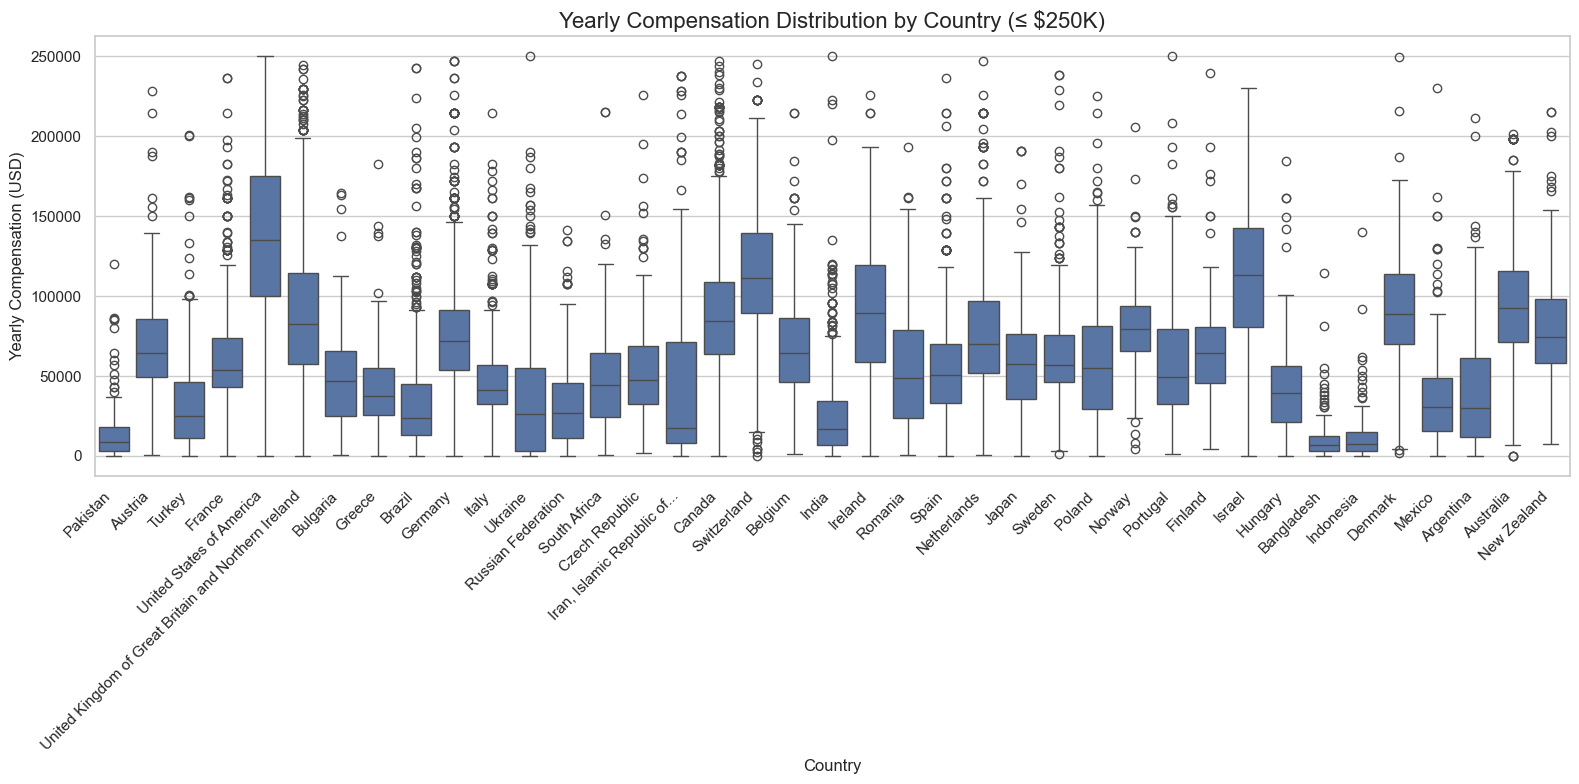

In [14]:
# Drop missing compensation or country data
df_filtered = df[['Country', 'ConvertedCompYearly']].dropna()

# Optional: Filter to countries with at least 100 respondents for clarity
top_countries = df_filtered['Country'].value_counts()[df_filtered['Country'].value_counts() >= 100].index
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries)]

# Optional: Remove extreme outliers above 250,000 USD to enhance readability
df_top_countries = df_top_countries[df_top_countries['ConvertedCompYearly'] <= 250000]

# Set plot style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Create box plot
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Yearly Compensation Distribution by Country (≤ $250K)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


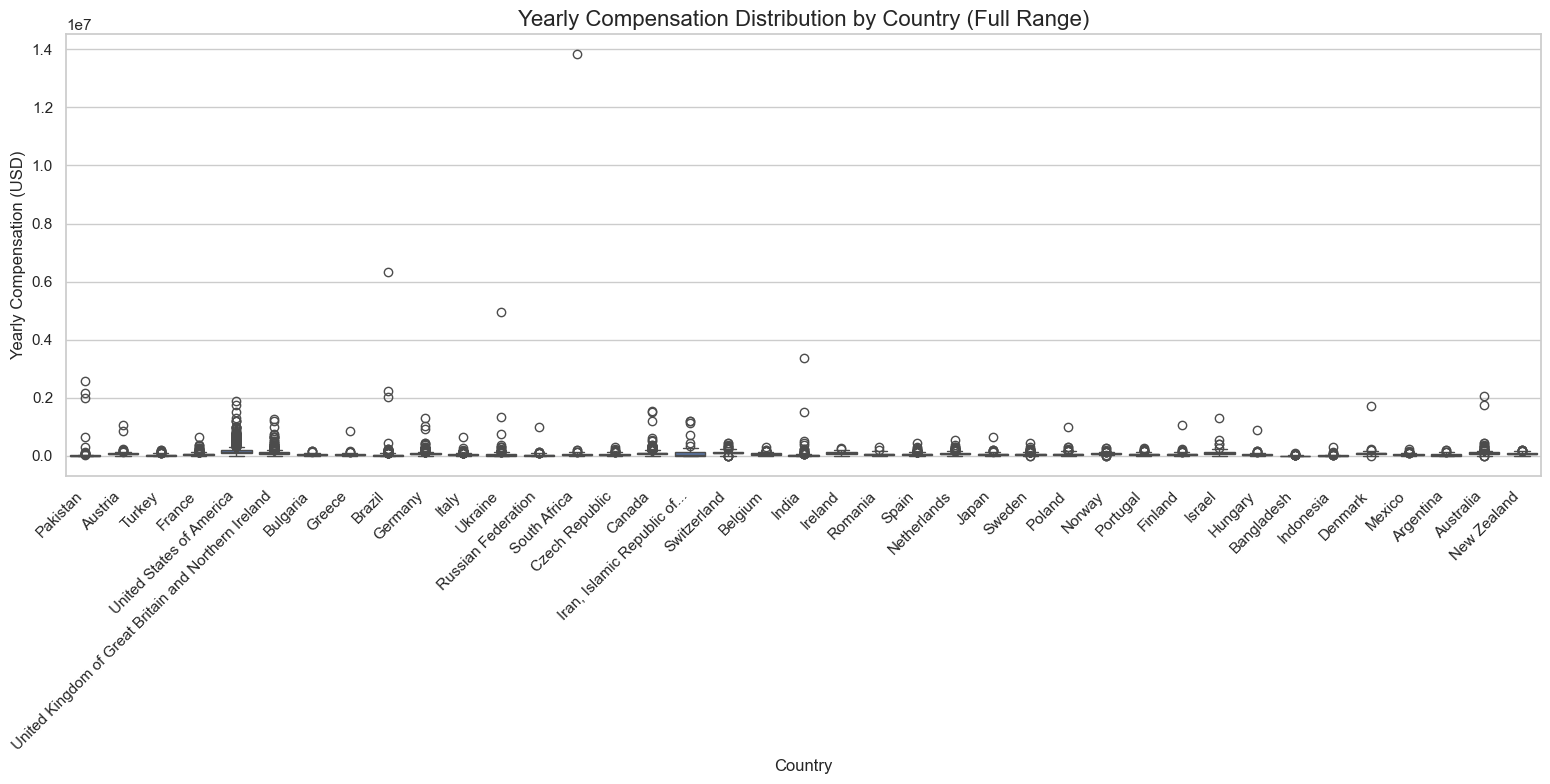

In [16]:
# Drop missing compensation or country data
df_filtered = df[['Country', 'ConvertedCompYearly']].dropna()

# Optional: Keep only countries with at least 100 responses
top_countries = df_filtered['Country'].value_counts()[df_filtered['Country'].value_counts() >= 100].index
df_top_countries = df_filtered[df_filtered['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Create box plot without compensation cap
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Yearly Compensation Distribution by Country (Full Range)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Yearly Compensation (USD)', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [17]:
# Step 1: Drop missing values
comp_data = df['ConvertedCompYearly'].dropna()

# Step 2: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = comp_data.quantile(0.25)
Q3 = comp_data.quantile(0.75)
IQR = Q3 - Q1

# Step 3: Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_refined = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Step 5: Validate result
print(f"Original dataset size: {df.shape[0]}")
print(f"Refined dataset size: {df_refined.shape[0]}")
print(f"Removed {df.shape[0] - df_refined.shape[0]} outliers from ConvertedCompYearly")


Original dataset size: 65437
Refined dataset size: 22457
Removed 42980 outliers from ConvertedCompYearly


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


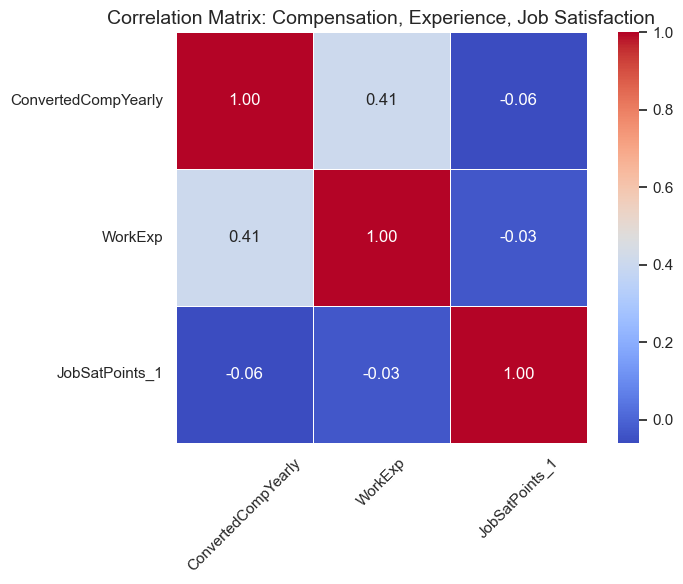

In [18]:
# Step 1: Subset and drop missing values from the refined DataFrame
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_corr = df_refined[cols].dropna()

# Step 2: Calculate Pearson correlation matrix
corr_matrix = df_corr.corr(method='pearson')

# Step 3: Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)

# Add title and labels
plt.title('Correlation Matrix: Compensation, Experience, Job Satisfaction', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


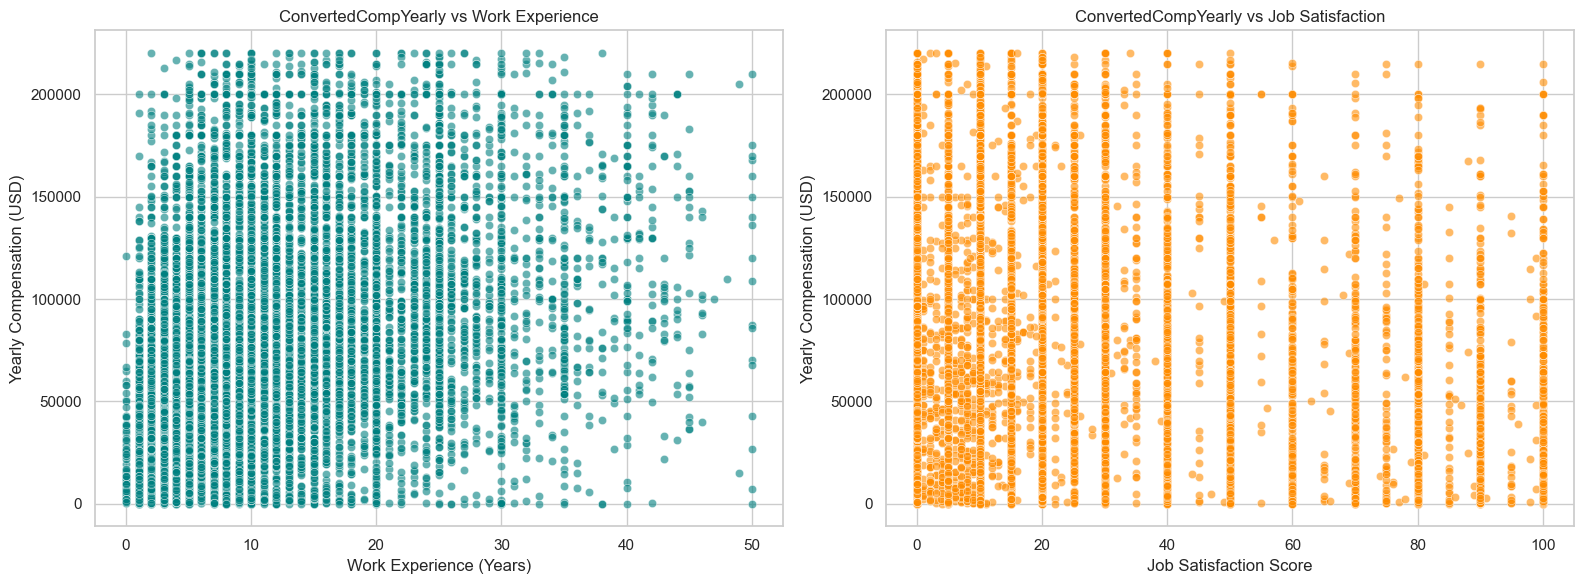

In [19]:
# Ensure required columns are present and cleaned
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
df_scatter = df_refined[cols].dropna()

# Set plot style
sns.set(style='whitegrid')

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Compensation vs Work Experience
sns.scatterplot(data=df_scatter, x='WorkExp', y='ConvertedCompYearly', ax=axes[0], color='teal', alpha=0.6)
axes[0].set_title('ConvertedCompYearly vs Work Experience')
axes[0].set_xlabel('Work Experience (Years)')
axes[0].set_ylabel('Yearly Compensation (USD)')

# Plot 2: Compensation vs Job Satisfaction
sns.scatterplot(data=df_scatter, x='JobSatPoints_1', y='ConvertedCompYearly', ax=axes[1], color='darkorange', alpha=0.6)
axes[1].set_title('ConvertedCompYearly vs Job Satisfaction')
axes[1].set_xlabel('Job Satisfaction Score')
axes[1].set_ylabel('Yearly Compensation (USD)')

# Improve layout
plt.tight_layout()
plt.show()


<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
